In [1]:
# MA2K4
# Assignment4
# Numerical Part

In [2]:
# 4.7

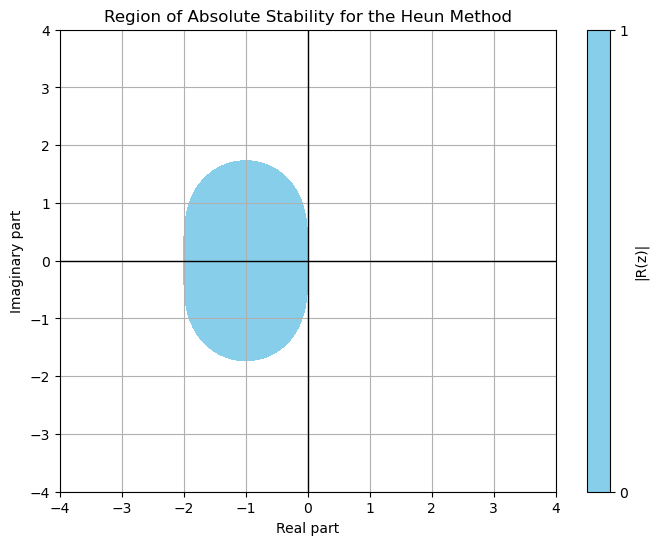

In [3]:
# a

import numpy as np
import matplotlib.pyplot as plt

# define the range for the complex number z
z_real = np.linspace(-4, 4, 400)
z_imag = np.linspace(-4, 4, 400)
Z_real, Z_imag = np.meshgrid(z_real, z_imag)
Z = Z_real + 1j * Z_imag

# for the Heun method in Q4.2, the stability condition is R(z) = |1 + z + z^2/2|
R_Heun = np.abs(1 + Z + Z**2 / 2)

# plot the region of absolute stability
plt.figure(figsize=[8,6])
# contour plot for |R(z)| <= 1
plt.contourf(Z_real, Z_imag, R_Heun, levels=[0, 1], extend='neither', colors='skyblue')
plt.colorbar(label='|R(z)|')
plt.title('Region of Absolute Stability for the Heun Method')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.grid(True)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()

In [4]:
# As the graph shows,the absolute stability region of the Heun method does not encompass the entire left half of the complex plane.
# Thus, the Heun method is not A-stable, as the absolute stability region an A-stable method should contain the entire left half of the complex plane.

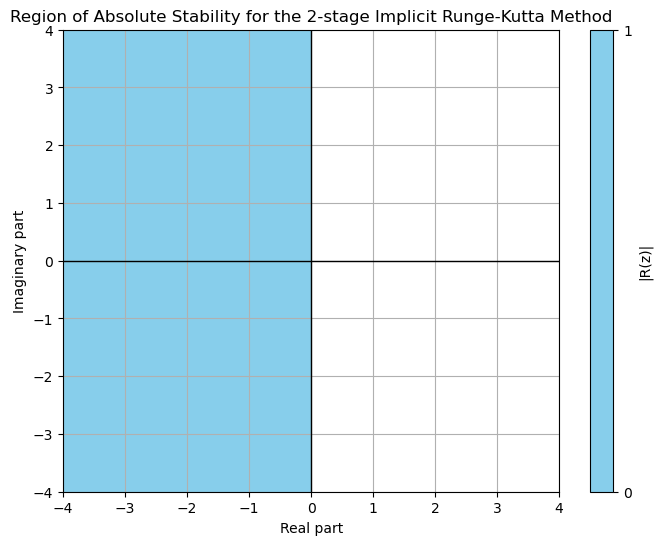

In [5]:
# b

# define the stability function R(z) for the 2-stage implicit Runge-Kutta method in Q4.6
def R(z):
    return (1 + 0.5 * z + (1/12) * z**2) / (1 - 0.5 * z + (1/12) * z**2)

# generate complex plane for z values
z_real = np.linspace(-4, 4, 400)
z_imag = np.linspace(-4, 4, 400)
Z_real, Z_imag = np.meshgrid(z_real, z_imag)
Z = Z_real + 1j * Z_imag

# calculate |R(z)|
R_values = np.abs(R(Z))

# plot the region of absolute stability
plt.figure(figsize=[8,6])
plt.contourf(Z_real, Z_imag, R_values, levels=[0, 1], extend='neither', colors='skyblue')
plt.colorbar(label='|R(z)|')
plt.title('Region of Absolute Stability for the 2-stage Implicit Runge-Kutta Method')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.grid(True)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()

In [6]:
# As the graph shows,the absolute stability region of the method in Q4.6 contains the entire left half of the complex plane.
# Therefore, the method is A-stable.

In [7]:
# 4.8

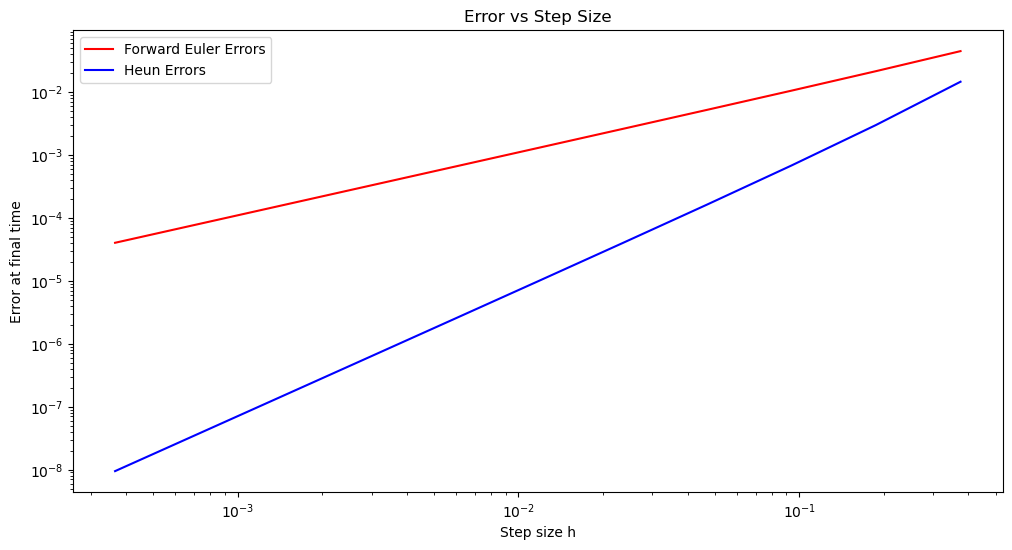

Forward Euler Method - Step Size vs EOC:
Step Size       EOC            
0.37500         nan            
0.18750         1.05763        
0.09375         1.02950        
0.04688         1.01478        
0.02344         1.00738        
0.01172         1.00369        
0.00586         1.00184        
0.00293         1.00092        
0.00146         1.00046        
0.00073         1.00023        
0.00037         1.00012        

Heun Method - Step Size vs EOC:
Step Size       EOC            
0.37500         nan            
0.18750         2.28439        
0.09375         2.13840        
0.04688         2.06656        
0.02344         2.03255        
0.01172         2.01609        
0.00586         2.00800        
0.00293         2.00399        
0.00146         2.00199        
0.00073         2.00099        
0.00037         2.00050        


In [8]:
#a

# function to evolve the solution over time using a given Runge-Kutta method
def evolve(method, t0, y0, T, h):
    N = int(T/h)  # number of steps
    t = t0
    y = y0
    ys = [y]
    ts = [t]
    
    for _ in range(N):
        y = method(t, y, f, h)
        t += h
        ys.append(y)
        ts.append(t)
    
    return np.array(ts), np.array(ys)


# implementing the lastError function
def lastError(Phi, h, N):
    t0, y0 = 0, 1  # Initial conditions

    ts, ys = evolve(Phi, t0, y0, N * h, h)  # evolve system over N steps
    yN_exact = y_exact(ts[-1])  # exact solution at final time
    return ys[-1] - yN_exact  # dfifference at final step

#b

# implement the EOC function
def EOC(hs, es):
    eocs = [np.nan]  # First value is NaN because we cannot compute EOC without a previous error
    for i in range(1, len(es)):
        eoc = np.log(es[i-1] / es[i]) / np.log(hs[i-1] / hs[i])
        eocs.append(eoc)
    return np.array(eocs)

#c

# for the given step sizes and computing lastError for both methods
N0, T = 4, 1.5
step_sizes = [T / (N0 * 2**k) for k in range(11)]

# define the initial value problem
def f(t, y):
    return -(1 + t) * y**2

# exact solution for comparison
def y_exact(t):
    return 2 / (t**2 + 2*t + 2)

# define both methods
def forward_euler(t, u, f, h):
    return u + h * f(t, u)
def heun_method(t, u, f, h):
    k1 = f(t, u)
    k2 = f(t + h, u + h * k1)
    return u + h * 0.5 * (k1 + k2)

# compute errors
errors_euler = []
errors_heun = []
for h in step_sizes:
    N = int(T / h)
    errors_euler.append(abs(lastError(forward_euler, h, N)))
    errors_heun.append(abs(lastError(heun_method, h, N)))

# compute EOCs
eocs_euler = EOC(step_sizes, errors_euler)
eocs_heun = EOC(step_sizes, errors_heun)

# graphical evaluation
plt.figure(figsize=(12, 6))

# plotting errors
plt.loglog(step_sizes, errors_euler, 'r-', label='Forward Euler Errors')
plt.loglog(step_sizes, errors_heun, 'b-', label='Heun Errors')
plt.xlabel('Step size h')
plt.ylabel('Error at final time')
plt.title('Error vs Step Size')
plt.legend()
plt.show()

# prepare data for table display of step sizes with corresponding EOCs
euler_table_data = list(zip(step_sizes, eocs_euler))
heun_table_data = list(zip(step_sizes, eocs_heun))

# display EOC tables with corresponding step sizes
print("Forward Euler Method - Step Size vs EOC:")
print("{:<15} {:<15}".format('Step Size', 'EOC'))
for h, eoc in euler_table_data:
    print("{:<15.5f} {:<15.5f}".format(h, eoc))

print("\nHeun Method - Step Size vs EOC:")
print("{:<15} {:<15}".format('Step Size', 'EOC'))
for h, eoc in heun_table_data:
    print("{:<15.5f} {:<15.5f}".format(h, eoc))

In [9]:
# Comments on EOCs
# For the Forward Euler method, the EOC values are around 1, confirming its nature as a first-order method.
# This is consistent across different step sizes.
# For the Heun method, the EOC values are close to 2, which confirms its second-order accuracy. 
# The closer the EOC is to 2, the more accurate the method is at predicting the solution's behavior for small step sizes.

# Comments on plots
# For the Forward Euler method, the error decreases linearly on the log-log scale as the step size decreases, 
# indicating that it's a first-order method.
# For the Heun method, the error decreases much faster, roughly quadratically on the log-log scale,
# indicating it is a second-order method.

In [10]:
# 4.9

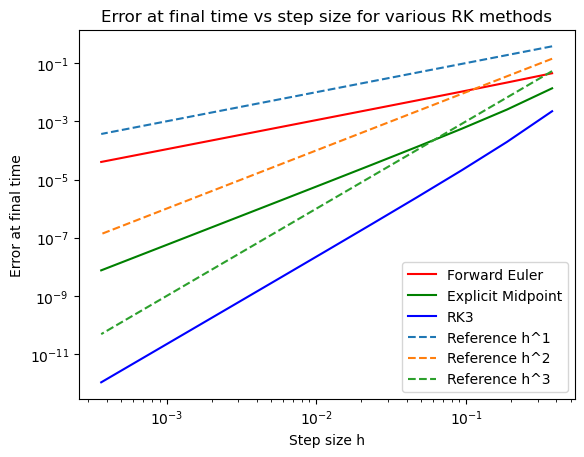

In [11]:
# a

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# step size and time interval
N0 = 4
T = 1.5
t0 = 0
y0 = 1

# function to implement a generic explicit Runge-Kutta method
def explicitRK(t, u, f, h, A, b, c):
    s = len(b)  # number of stages
    K = np.zeros(s)
    for i in range(s):
        ti = t + c[i] * h
        ui = u
        for j in range(i):
            ui += A[i][j] * K[j] * h
        K[i] = f(ti, ui)
    return u + h * np.dot(K, b)

# implementing Forward Euler, Explicit Midpoint, and RK3 methods
def forward_euler(t, u, f, h):
    A = np.array([[0]])
    b = np.array([1])
    c = np.array([0])
    return explicitRK(t, u, f, h, A, b, c)

def explicit_midpoint(t, u, f, h):
    A = np.array([[0, 0], [1/2, 0]])
    b = np.array([0, 1])
    c = np.array([0, 1/2])
    return explicitRK(t, u, f, h, A, b, c)

def RK3(t, u, f, h):
    A = np.array([[0, 0, 0], [1/2, 0, 0], [-1, 2, 0]])
    b = np.array([1/6, 2/3, 1/6])
    c = np.array([0, 1/2, 1])
    return explicitRK(t, u, f, h, A, b, c)

# evaluate and plot errors for each method
methods = [forward_euler, explicit_midpoint, RK3]
method_names = ['Forward Euler', 'Explicit Midpoint', 'RK3']
colors = ['r', 'g', 'b']
errors = {name: [] for name in method_names}
hs = []

# Calculate errors for different step sizes
for k in range(11):
    h = T / (N0 * 2**k)
    hs.append(h)
    for method, name, color in zip(methods, method_names, colors):
        ts, ys = evolve(method, t0, y0, T, h)
        errors[name].append(abs(ys[-1] - y_exact(T)))

# plotting the errors
for name, color in zip(method_names, colors):
    plt.loglog(hs, errors[name], color=color, label=name)

plt.loglog(hs, hs, '--', label='Reference h^1')
plt.loglog(hs, [h**2 for h in hs], '--', label='Reference h^2')
plt.loglog(hs, [h**3 for h in hs], '--', label='Reference h^3')

plt.xlabel('Step size h')
plt.ylabel('Error at final time')
plt.legend()
plt.title('Error at final time vs step size for various RK methods')
plt.show()

In [12]:
# The graph of the Forward Euler method, which is a first-order method, is nearly parallel to the line of stepsize h.
# This indicates that the error is proportional to h, which is consistent with theoretical expectation.

# The graph of the Explicit Midpoint method, which is a second-order method, is nearly parallel to the line of h^2.
# This indicates that the error is proportional to h^2, which is consistent with theoretical expectation.

# The graph of the R3 method, which is a third-order method, is nearly parallel to the line of h^3.
# This indicates that the error is proportional to h^3, which is consistent with theoretical expectation.

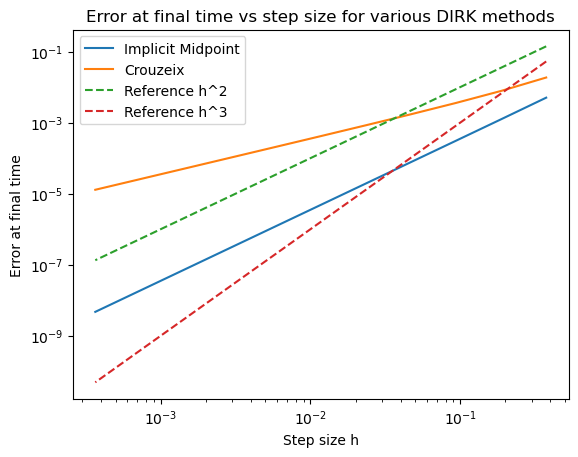

In [13]:
# b

from scipy.optimize import root_scalar

# function to implement a generic diagonally implicit Runge-Kutta (DIRK) method
def DIRK(t, u, f, h, A, b, c):
    s = len(b)  # number of stages
    K = np.zeros(s)
    for i in range(s):
        ti = t + c[i] * h

        def F(x):
            sum_ = np.dot(A[i, :i], K[:i])
            return x - f(ti, u + h * (sum_ + A[i, i] * x))

        # initial guesses for the root finder
        x0 = f(t, u)
        x1 = f(t + h, u + h * x0)

        # compute K[i]
        Ki = root_scalar(F, x0=x0, x1=x1, method='secant').root
        K[i] = Ki

    return u + h * np.dot(K, b)

# implement Implicit Midpoint and Crouzeix methods
def implicit_midpoint(t, u, f, h):
    A = np.array([[1/2]])
    b = np.array([1])
    c = np.array([1/2])
    return DIRK(t, u, f, h, A, b, c)

def crouzeix(t, u, f, h):
    sqrt_3_6 = np.sqrt(3) / 6
    A = np.array([[1/2 - sqrt_3_6, 0],
                  [1/2 + sqrt_3_6, 1/2 - sqrt_3_6]])
    b = np.array([1/2, 1/2])
    c = np.array([1/2 - sqrt_3_6, 1/2 + sqrt_3_6])
    return DIRK(t, u, f, h, A, b, c)

# plot errors for each implicit method
implicit_methods = [implicit_midpoint, crouzeix]
implicit_method_names = ['Implicit Midpoint', 'Crouzeix']
implicit_errors = {name: [] for name in implicit_method_names}

# calculate errors for different step sizes
for k in range(11):
    h = T / (N0 * 2**k)
    for method, name in zip(implicit_methods, implicit_method_names):
        ts, ys = evolve(method, t0, y0, T, h)
        implicit_errors[name].append(abs(ys[-1] - y_exact(T)))

# plot the errors for implicit methods
for name in implicit_method_names:
    plt.loglog(hs, implicit_errors[name], label=name)

plt.loglog(hs, [h**2 for h in hs], '--', label='Reference h^2')
plt.loglog(hs, [h**3 for h in hs], '--', label='Reference h^3')

plt.xlabel('Step size h')
plt.ylabel('Error at final time')
plt.legend()
plt.title('Error at final time vs step size for various DIRK methods')
plt.show()

In [14]:
# The graph of the Implicit Midpoint method is nearly parallel to the line of h^2,
# which indicates that it's a second order method.

# The graph of the Crouzeix method has a close slople to the line of h^3,
# which indicates that it's roughly proportional to h^3, hence a third-order method.